# AI-Driven Simulation: *C. elegans* Mitochondrial Energy Dynamics
# Proof-of-Concept for Synthetic Mitochondrial Genome Testing

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/225301479.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Design_ID", y="Performance_Score", data=top10, palette="viridis")


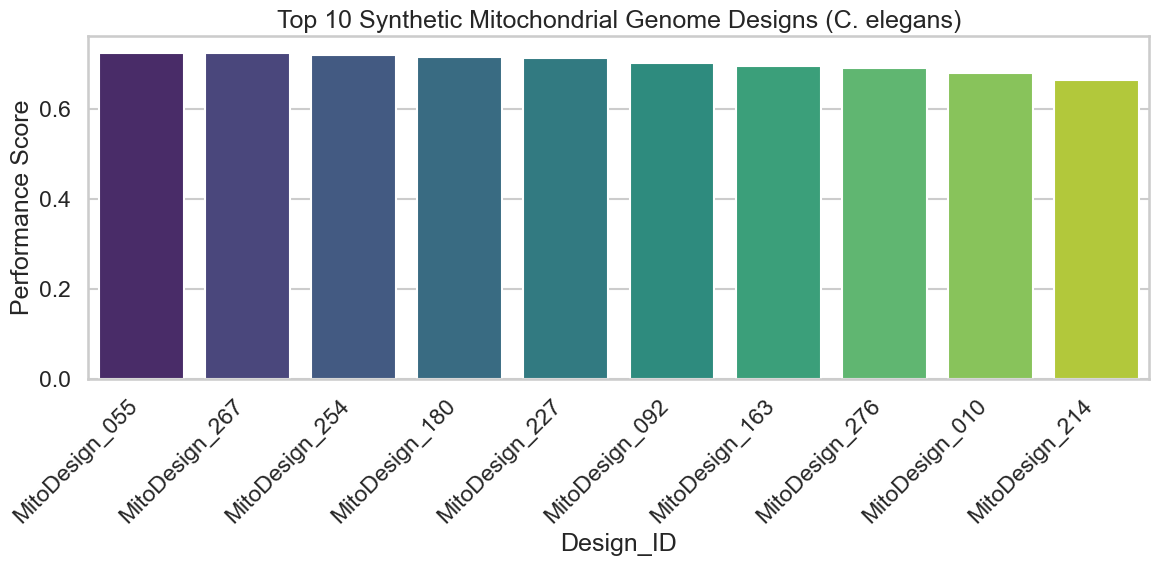

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/225301479.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances, palette="mako")


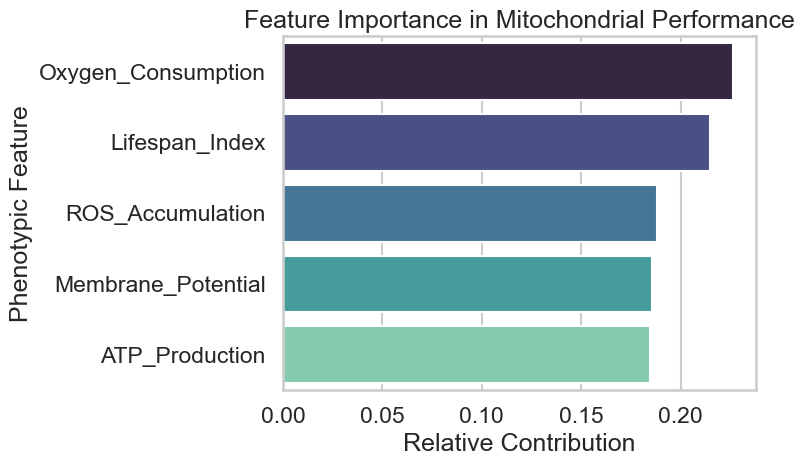

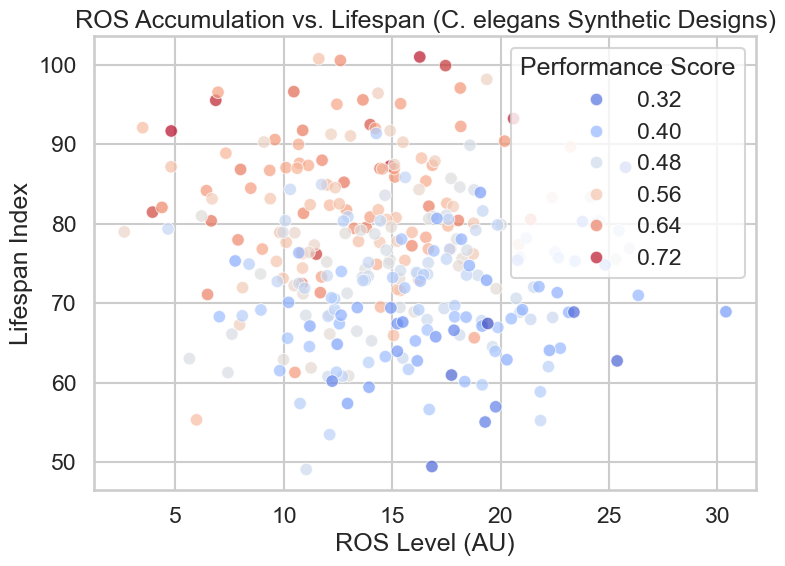

Simulation complete! Top synthetic designs exported to CSV.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Set styles
sns.set(style="whitegrid", context="talk")
np.random.seed(42)

# 1. GENERATE SYNTHETIC MITOCHONDRIAL GENOME DESIGNS

num_designs = 300  # number of synthetic genome variants

# Simulate mitochondrial energy parameters
data = pd.DataFrame({
    "Design_ID": [f"MitoDesign_{i+1:03d}" for i in range(num_designs)],
    "ATP_Production": np.random.normal(100, 20, num_designs),      # mmol ATP / L / hr
    "ROS_Accumulation": np.random.normal(15, 5, num_designs),      # arbitrary fluorescence units
    "Oxygen_Consumption": np.random.normal(220, 40, num_designs),  # pmol O₂ / min
    "Membrane_Potential": np.random.normal(140, 25, num_designs),  # mV
    "Lifespan_Index": np.random.normal(75, 10, num_designs)        # normalized 0-100 scale
})

# Clip unrealistic values
for col in ["ATP_Production", "ROS_Accumulation", "Oxygen_Consumption", "Membrane_Potential", "Lifespan_Index"]:
    data[col] = data[col].clip(lower=0)

# 2. CALCULATE PERFORMANCE SCORE FOR SYNTHETIC DESIGNS

# Normalize all features between 0 and 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.iloc[:, 1:])
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:])

# Formula for performance: ATP ↑, OCR ↑, Lifespan ↑, ROS ↓
data["Performance_Score"] = (
    0.35 * scaled_df["ATP_Production"] +
    0.25 * scaled_df["Oxygen_Consumption"] +
    0.25 * scaled_df["Lifespan_Index"] +
    0.15 * (1 - scaled_df["ROS_Accumulation"])
)

# Rank designs by performance
data = data.sort_values(by="Performance_Score", ascending=False).reset_index(drop=True)

# 3. VISUALIZE TOP 10 SYNTHETIC DESIGNS

top10 = data.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Design_ID", y="Performance_Score", data=top10, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Performance Score")
plt.title("Top 10 Synthetic Mitochondrial Genome Designs (C. elegans)")
plt.tight_layout()
plt.show()

# 4. FEATURE IMPORTANCE ANALYSIS

X = scaled_df
y = data["Performance_Score"]
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": data.columns[1:-1],
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importances, palette="mako")
plt.title("Feature Importance in Mitochondrial Performance")
plt.xlabel("Relative Contribution")
plt.ylabel("Phenotypic Feature")
plt.tight_layout()
plt.show()

# 5. LIFESPAN vs ROS RELATIONSHIP

plt.figure(figsize=(8, 6))
sns.scatterplot(x="ROS_Accumulation", y="Lifespan_Index", data=data,
                hue="Performance_Score", palette="coolwarm", alpha=0.7)
plt.title("ROS Accumulation vs. Lifespan (C. elegans Synthetic Designs)")
plt.xlabel("ROS Level (AU)")
plt.ylabel("Lifespan Index")
plt.legend(title="Performance Score")
plt.tight_layout()
plt.show()

# 6. SAVE RESULTS

data.to_csv("C_elegans_Mitochondrial_Performance.csv", index=False)

print("Simulation complete! Top synthetic designs exported to CSV.")

# AI Guided Dashboard, *C elegans* Synthetic Mitochondrial Phenotyping
# Non Interactive, Visualization

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/1035926701.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Design_ID", y="Performance_Score", data=top15, palette="viridis")


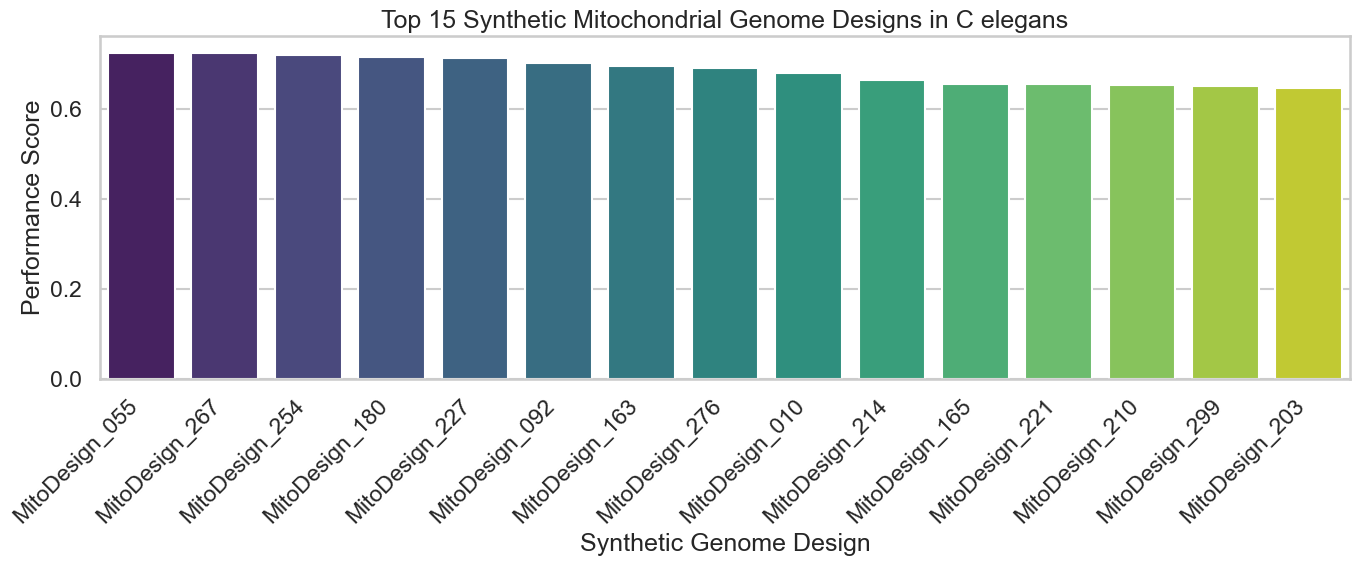

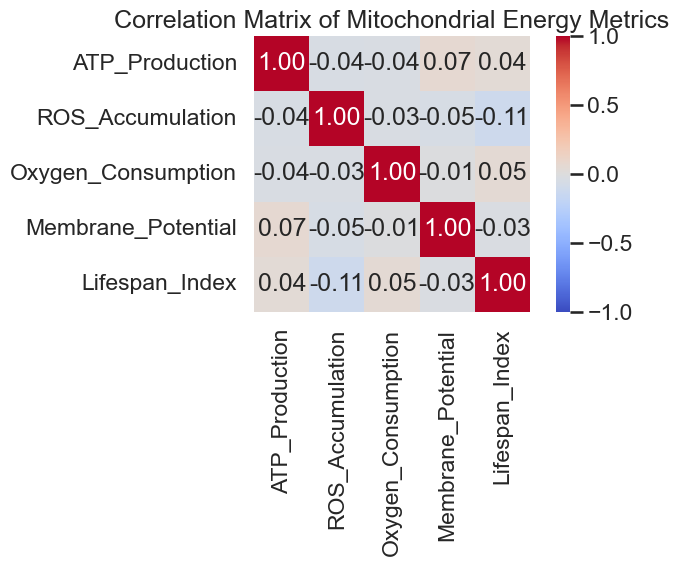

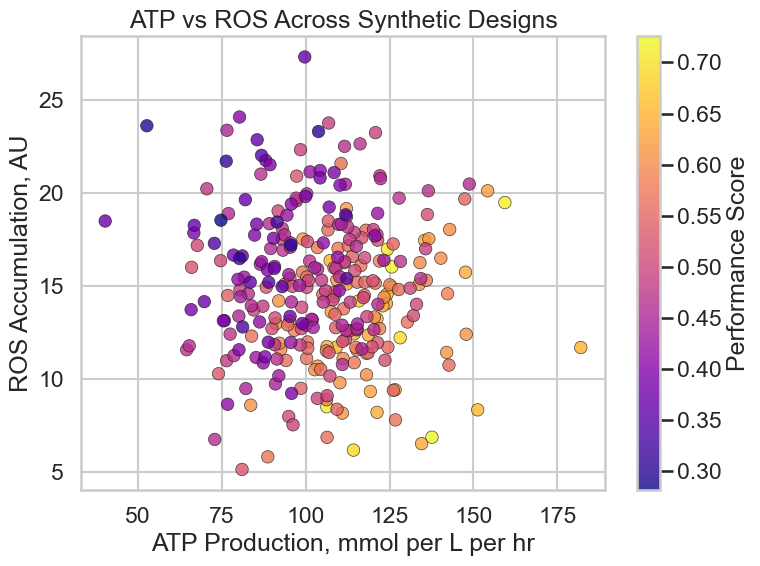

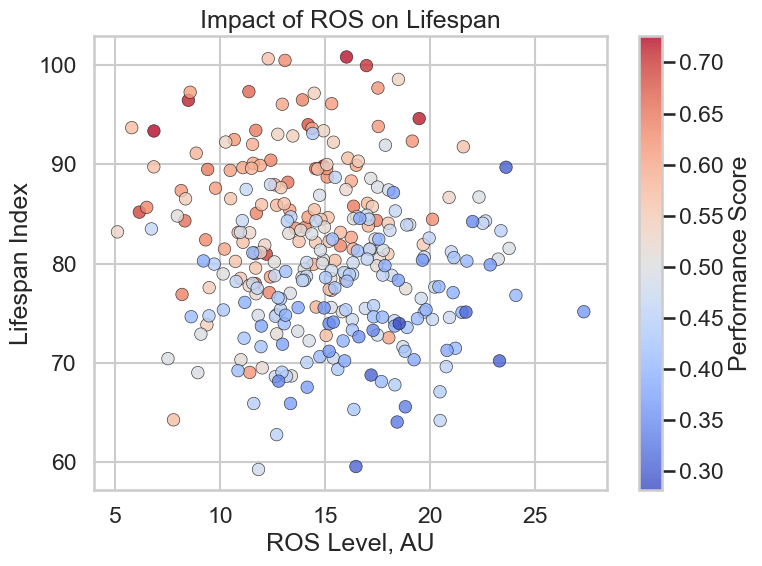

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/1035926701.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Performance_Tier", y="ATP_Production", data=data, palette="Set2", inner="quartile", cut=0)


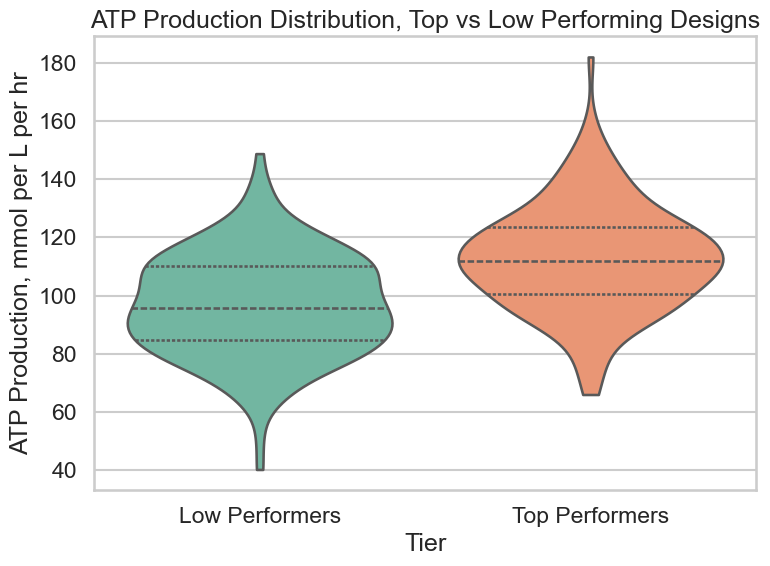

Dashboard complete, top synthetic designs exported to CSV as C_elegans_Top_Mitochondrial_Designs.csv


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1, GENERATE SYNTHETIC DATA
np.random.seed(42)
num_designs = 300

data = pd.DataFrame({
    "Design_ID": [f"MitoDesign_{i+1:03d}" for i in range(num_designs)],
    "ATP_Production": np.random.normal(105, 20, num_designs),      # mmol ATP per L per hr
    "ROS_Accumulation": np.random.normal(15, 4, num_designs),      # arbitrary fluorescence units
    "Oxygen_Consumption": np.random.normal(230, 35, num_designs),  # pmol O2 per min
    "Membrane_Potential": np.random.normal(150, 20, num_designs),  # mV
    "Lifespan_Index": np.random.normal(80, 8, num_designs)         # 0 to 100 scale
})

# Clip extreme negatives
for col in ["ATP_Production", "ROS_Accumulation", "Oxygen_Consumption", "Membrane_Potential", "Lifespan_Index"]:
    data[col] = data[col].clip(lower=0)

# 2, CALCULATE PERFORMANCE SCORE
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[["ATP_Production", "Oxygen_Consumption", "Lifespan_Index", "ROS_Accumulation"]])
scaled_df = pd.DataFrame(scaled, columns=["ATP_Production", "Oxygen_Consumption", "Lifespan_Index", "ROS_Accumulation"])

# Maximize ATP, OCR, lifespan, minimize ROS
data["Performance_Score"] = (
    0.35 * scaled_df["ATP_Production"] +
    0.25 * scaled_df["Oxygen_Consumption"] +
    0.25 * scaled_df["Lifespan_Index"] +
    0.15 * (1.0 - scaled_df["ROS_Accumulation"])
)

# Rank designs
data = data.sort_values(by="Performance_Score", ascending=False).reset_index(drop=True)

# 3, DASHBOARD VISUALIZATION
sns.set(style="whitegrid", context="talk")

# A, Top 15 Synthetic Designs Ranked by Performance
top15 = data.head(15)
plt.figure(figsize=(14, 6))
sns.barplot(x="Design_ID", y="Performance_Score", data=top15, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 Synthetic Mitochondrial Genome Designs in C elegans")
plt.ylabel("Performance Score")
plt.xlabel("Synthetic Genome Design")
plt.tight_layout()
plt.show()

# B, Correlation Heatmap Between Metrics
plt.figure(figsize=(8, 6))
corr = data[["ATP_Production", "ROS_Accumulation", "Oxygen_Consumption", "Membrane_Potential", "Lifespan_Index"]].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix of Mitochondrial Energy Metrics")
plt.tight_layout()
plt.show()

# C, ATP vs ROS, Trade off Visualization with Performance Color Mapping
plt.figure(figsize=(8, 6))
sc1 = plt.scatter(
    data["ATP_Production"], data["ROS_Accumulation"],
    c=data["Performance_Score"], cmap="plasma", alpha=0.8, edgecolors="k", linewidths=0.5
)
cbar1 = plt.colorbar(sc1)
cbar1.set_label("Performance Score")
plt.title("ATP vs ROS Across Synthetic Designs")
plt.xlabel("ATP Production, mmol per L per hr")
plt.ylabel("ROS Accumulation, AU")
plt.tight_layout()
plt.show()

# D, Lifespan vs ROS Gradient Plot with Performance Color Mapping
plt.figure(figsize=(8, 6))
sc2 = plt.scatter(
    data["ROS_Accumulation"], data["Lifespan_Index"],
    c=data["Performance_Score"], cmap="coolwarm", alpha=0.8, edgecolors="k", linewidths=0.5
)
cbar2 = plt.colorbar(sc2)
cbar2.set_label("Performance Score")
plt.title("Impact of ROS on Lifespan")
plt.xlabel("ROS Level, AU")
plt.ylabel("Lifespan Index")
plt.tight_layout()
plt.show()

# E, Violin Plot of ATP Across Top vs Low Performers
data["Performance_Tier"] = pd.qcut(data["Performance_Score"], q=2, labels=["Low Performers", "Top Performers"])
plt.figure(figsize=(8, 6))
sns.violinplot(x="Performance_Tier", y="ATP_Production", data=data, palette="Set2", inner="quartile", cut=0)
plt.title("ATP Production Distribution, Top vs Low Performing Designs")
plt.xlabel("Tier")
plt.ylabel("ATP Production, mmol per L per hr")
plt.tight_layout()
plt.show()

# 4, EXPORT DASHBOARD RESULTS
top15.to_csv("C_elegans_Top_Mitochondrial_Designs.csv", index=False)
print("Dashboard complete, top synthetic designs exported to CSV as C_elegans_Top_Mitochondrial_Designs.csv")

# *C. elegans* Mitochondrial Energy Dynamics
# MitoTALEN-Mediated Synthetic Genome Editing Simulation

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="ATP_Production", data=data, palette="viridis")


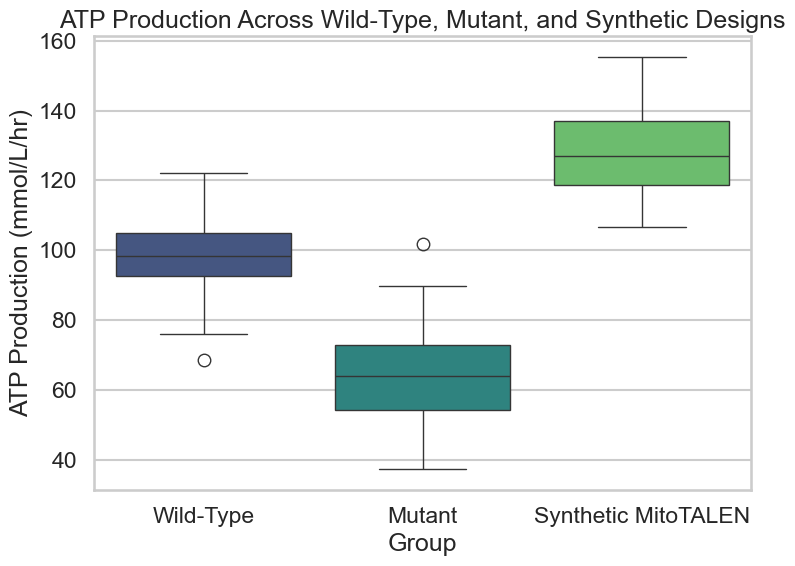

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="ROS_Accumulation", data=data, palette="coolwarm")


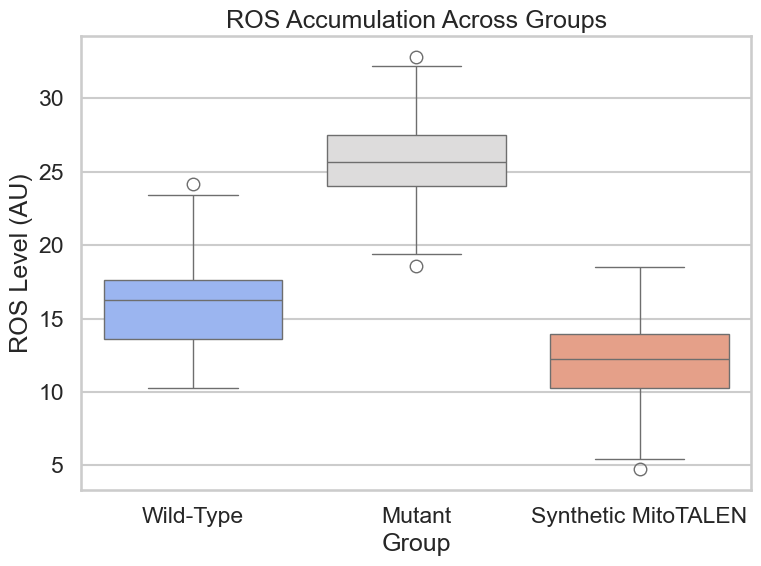

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Group", y="Lifespan_Index", data=data, palette="Set2")


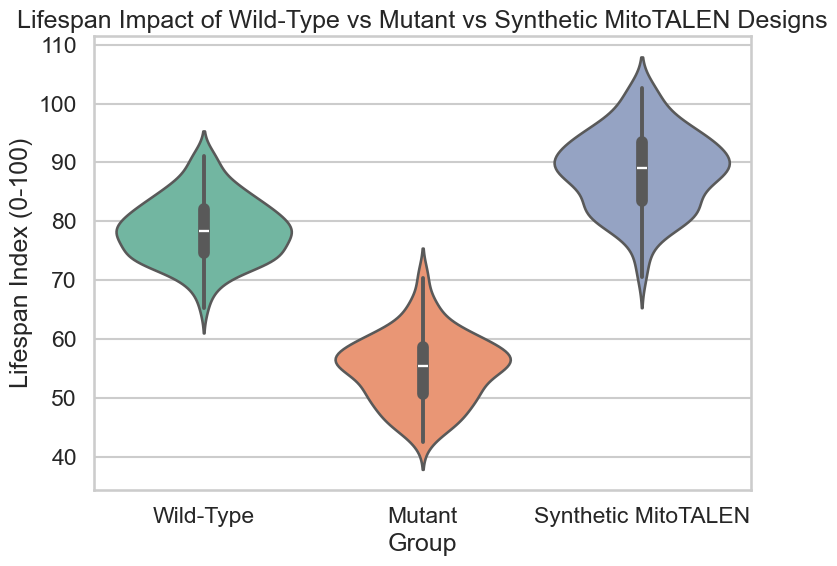

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Oxygen_Consumption", data=data, palette="mako")
/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:80: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


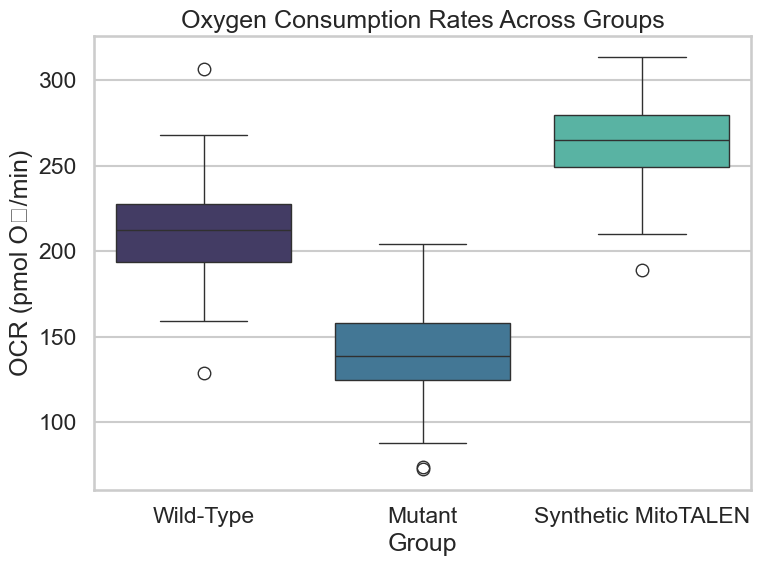

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Group", y="Performance_Score", data=data, estimator=np.mean, palette="plasma", ci="sd")
/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2070366523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Performance_Score", data=data, estimator=np.mean, palette="plasma", ci="sd")


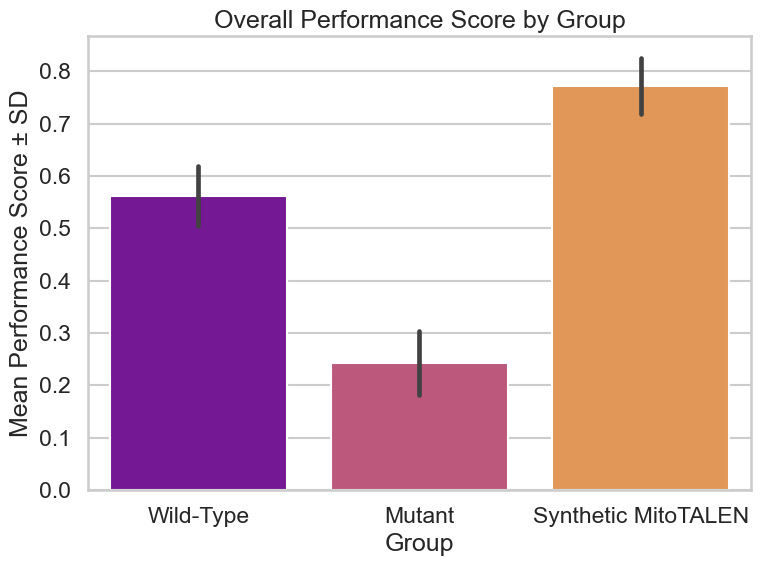

Dashboard complete — Synthetic MitoTALEN performance data exported.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# 1. SIMULATE THREE EXPERIMENTAL GROUPS

np.random.seed(42)
n_samples = 100

def generate_group_data(label, atp_mean, ros_mean, ocr_mean, lifespan_mean):
    return pd.DataFrame({
        "Group": [label] * n_samples,
        "ATP_Production": np.random.normal(atp_mean, 12, n_samples),
        "ROS_Accumulation": np.random.normal(ros_mean, 3, n_samples),
        "Oxygen_Consumption": np.random.normal(ocr_mean, 25, n_samples),
        "Lifespan_Index": np.random.normal(lifespan_mean, 6, n_samples)
    })

# Wild-type baseline
wildtype = generate_group_data("Wild-Type", atp_mean=100, ros_mean=16, ocr_mean=210, lifespan_mean=78)

# Mitochondrial dysfunction mutants
mutants = generate_group_data("Mutant", atp_mean=65, ros_mean=26, ocr_mean=140, lifespan_mean=55)

# Synthetic mitoTALEN-edited designs
synthetic = generate_group_data("Synthetic MitoTALEN", atp_mean=125, ros_mean=12, ocr_mean=260, lifespan_mean=88)

# Combine into single dataset
data = pd.concat([wildtype, mutants, synthetic], ignore_index=True)

# 2. CALCULATE PERFORMANCE SCORE

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[["ATP_Production", "ROS_Accumulation", "Oxygen_Consumption", "Lifespan_Index"]])
scaled_df = pd.DataFrame(scaled, columns=["ATP_Production", "ROS_Accumulation", "Oxygen_Consumption", "Lifespan_Index"])

data["Performance_Score"] = (
    0.4 * scaled_df["ATP_Production"] +
    0.3 * scaled_df["Oxygen_Consumption"] +
    0.2 * scaled_df["Lifespan_Index"] +
    0.1 * (1 - scaled_df["ROS_Accumulation"])
)

# 3. VISUAL DASHBOARD

sns.set(style="whitegrid", context="talk")

# A. ATP Production Comparison
plt.figure(figsize=(8,6))
sns.boxplot(x="Group", y="ATP_Production", data=data, palette="viridis")
plt.title("ATP Production Across Wild-Type, Mutant, and Synthetic Designs")
plt.ylabel("ATP Production (mmol/L/hr)")
plt.tight_layout()
plt.show()

# B. ROS Accumulation Comparison
plt.figure(figsize=(8,6))
sns.boxplot(x="Group", y="ROS_Accumulation", data=data, palette="coolwarm")
plt.title("ROS Accumulation Across Groups")
plt.ylabel("ROS Level (AU)")
plt.tight_layout()
plt.show()

# C. Lifespan Distribution Comparison
plt.figure(figsize=(8,6))
sns.violinplot(x="Group", y="Lifespan_Index", data=data, palette="Set2")
plt.title("Lifespan Impact of Wild-Type vs Mutant vs Synthetic MitoTALEN Designs")
plt.ylabel("Lifespan Index (0-100)")
plt.tight_layout()
plt.show()

# D. Oxygen Consumption Comparison
plt.figure(figsize=(8,6))
sns.boxplot(x="Group", y="Oxygen_Consumption", data=data, palette="mako")
plt.title("Oxygen Consumption Rates Across Groups")
plt.ylabel("OCR (pmol O₂/min)")
plt.tight_layout()
plt.show()

# E. Integrated Performance Score
plt.figure(figsize=(8,6))
sns.barplot(x="Group", y="Performance_Score", data=data, estimator=np.mean, palette="plasma", ci="sd")
plt.title("Overall Performance Score by Group")
plt.ylabel("Mean Performance Score ± SD")
plt.tight_layout()
plt.show()

# 4. EXPORT SYNTHETIC RESULTS

synthetic_results = data[data["Group"] == "Synthetic MitoTALEN"].sort_values(by="Performance_Score", ascending=False)
synthetic_results.to_csv("C_elegans_Synthetic_MitoTALEN_Performance.csv", index=False)

print("Dashboard complete — Synthetic MitoTALEN performance data exported.")

# *C. elegans* Live Imaging Simulation - Synthetic Mitochondrial Designs
# MitoTALEN-Based Genome Editing + Fluorescence Phenotyping

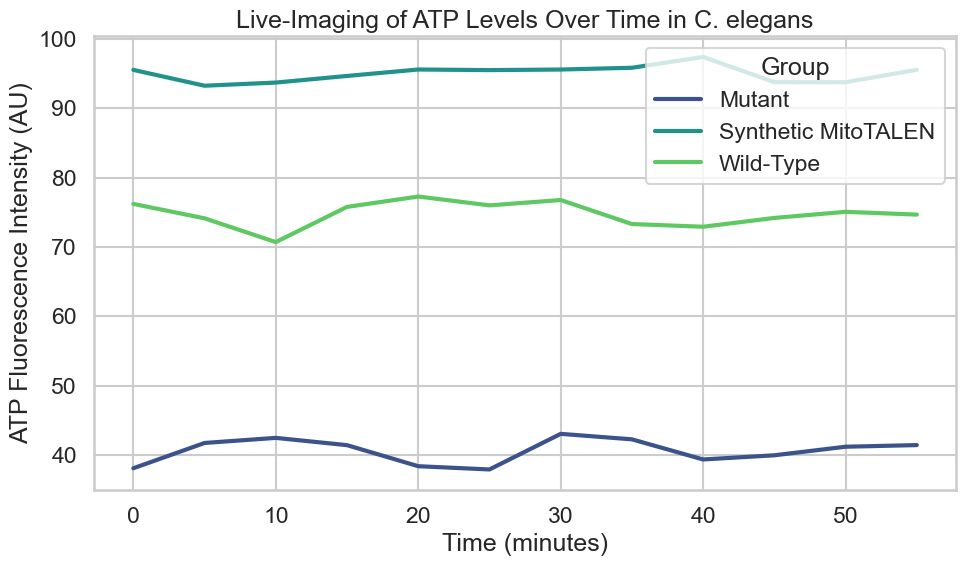

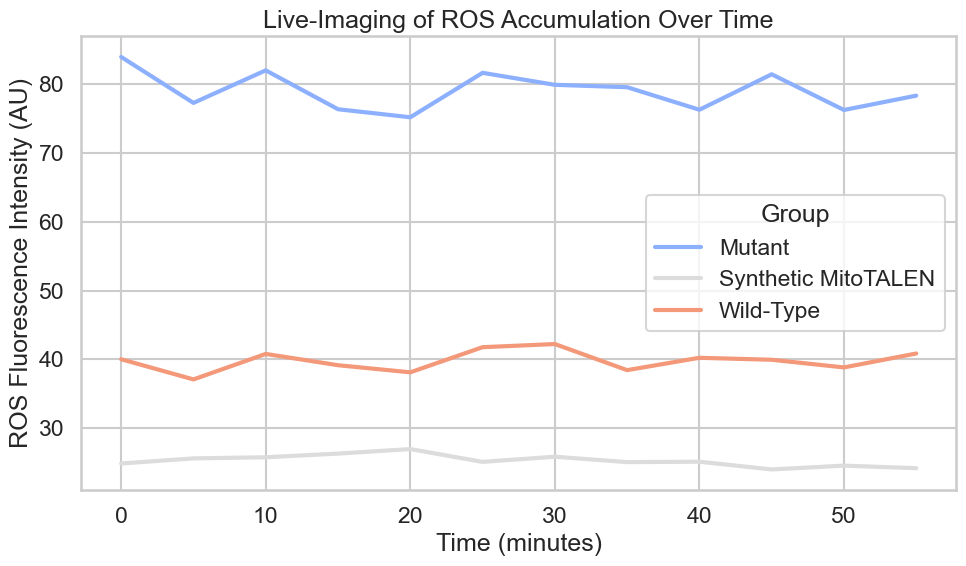

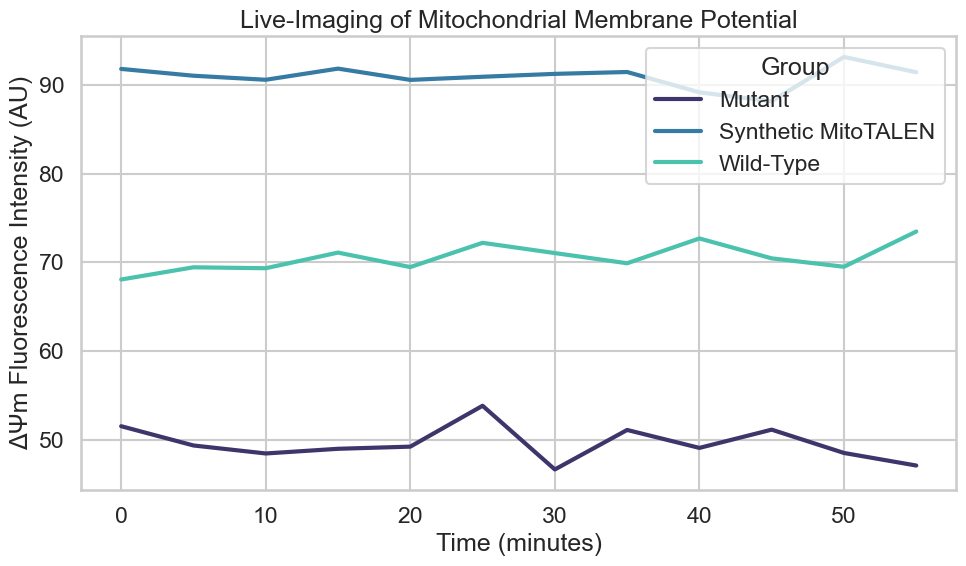

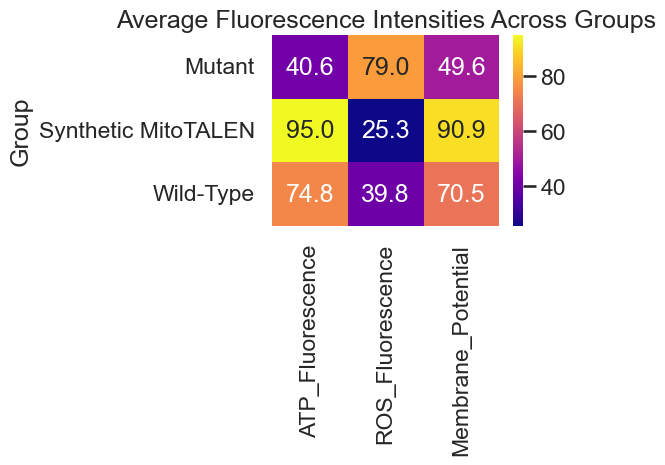

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/720643100.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_scaled.index, y=summary_scaled["Performance_Score"], palette="viridis")


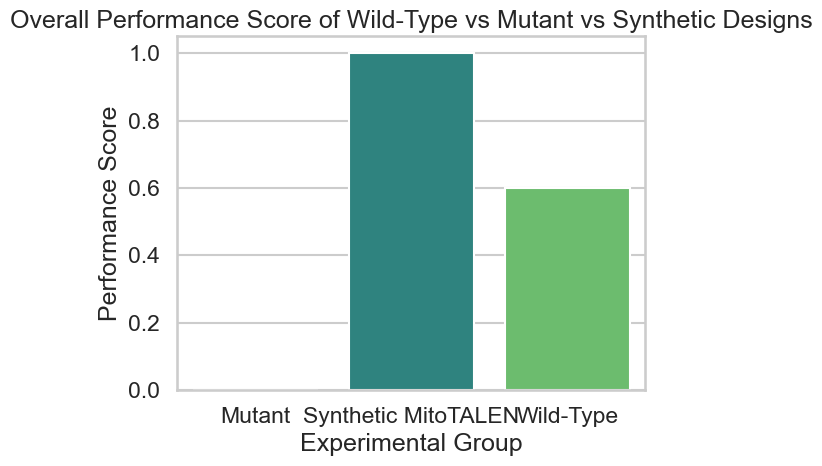

Live-imaging mitoTALEN dashboard complete — results exported.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# 1. SIMULATE LIVE-IMAGING DATA

np.random.seed(42)
time_points = np.arange(0, 60, 5)  # 60 minutes, 5-min intervals
worms_per_group = 10

def simulate_fluorescence_signal(base_mean, variability, time_decay=False):
    """Simulate fluorescence imaging intensity over time."""
    signal = base_mean + np.random.normal(0, variability, len(time_points))
    if time_decay:
        decay = np.exp(-time_points / 40)
        signal = signal * decay
    return np.clip(signal, 0, None)

groups = ["Wild-Type", "Mutant", "Synthetic MitoTALEN"]
fluorescence_data = []

for group in groups:
    for worm in range(worms_per_group):
        if group == "Wild-Type":
            atp = simulate_fluorescence_signal(75, 5)
            ros = simulate_fluorescence_signal(40, 4)
            mem = simulate_fluorescence_signal(70, 5)
        elif group == "Mutant":
            atp = simulate_fluorescence_signal(40, 7)
            ros = simulate_fluorescence_signal(80, 10)
            mem = simulate_fluorescence_signal(50, 8)
        else:  # Synthetic mitoTALEN
            atp = simulate_fluorescence_signal(95, 5)
            ros = simulate_fluorescence_signal(25, 3)
            mem = simulate_fluorescence_signal(90, 4)

        for t, a, r, m in zip(time_points, atp, ros, mem):
            fluorescence_data.append([group, worm, t, a, r, m])

df_live = pd.DataFrame(fluorescence_data,
                       columns=["Group", "Worm", "Time", "ATP_Fluorescence", "ROS_Fluorescence", "Membrane_Potential"])

# 2. COMPUTE MEAN SIGNALS FOR EACH GROUP

df_mean = df_live.groupby(["Group", "Time"]).mean().reset_index()

# 3. DASHBOARD VISUALIZATION
sns.set(style="whitegrid", context="talk")

# A. ATP Dynamics Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mean, x="Time", y="ATP_Fluorescence", hue="Group", palette="viridis", linewidth=3)
plt.title("Live-Imaging of ATP Levels Over Time in C. elegans")
plt.ylabel("ATP Fluorescence Intensity (AU)")
plt.xlabel("Time (minutes)")
plt.tight_layout()
plt.show()

# B. ROS Dynamics Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mean, x="Time", y="ROS_Fluorescence", hue="Group", palette="coolwarm", linewidth=3)
plt.title("Live-Imaging of ROS Accumulation Over Time")
plt.ylabel("ROS Fluorescence Intensity (AU)")
plt.xlabel("Time (minutes)")
plt.tight_layout()
plt.show()

# C. Membrane Potential Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mean, x="Time", y="Membrane_Potential", hue="Group", palette="mako", linewidth=3)
plt.title("Live-Imaging of Mitochondrial Membrane Potential")
plt.ylabel("ΔΨm Fluorescence Intensity (AU)")
plt.xlabel("Time (minutes)")
plt.tight_layout()
plt.show()

# D. Heatmap of Final ATP, ROS, and Membrane Potential Signals
summary = df_live.groupby("Group")[["ATP_Fluorescence", "ROS_Fluorescence", "Membrane_Potential"]].mean()
plt.figure(figsize=(6, 5))
sns.heatmap(summary, annot=True, cmap="plasma", fmt=".1f")
plt.title("Average Fluorescence Intensities Across Groups")
plt.tight_layout()
plt.show()

# 4. PERFORMANCE METRIC CALCULATION

scaler = MinMaxScaler()
scaled = scaler.fit_transform(summary)
summary_scaled = pd.DataFrame(scaled, index=summary.index, columns=summary.columns)

# ATP ↑, Membrane Potential ↑, ROS ↓
summary_scaled["Performance_Score"] = (
    0.4 * summary_scaled["ATP_Fluorescence"] +
    0.4 * summary_scaled["Membrane_Potential"] +
    0.2 * (1 - summary_scaled["ROS_Fluorescence"])
)

plt.figure(figsize=(6, 5))
sns.barplot(x=summary_scaled.index, y=summary_scaled["Performance_Score"], palette="viridis")
plt.title("Overall Performance Score of Wild-Type vs Mutant vs Synthetic Designs")
plt.ylabel("Performance Score")
plt.xlabel("Experimental Group")
plt.tight_layout()
plt.show()

# 5. EXPORT RESULTS

df_mean.to_csv("C_elegans_Live_Imaging_Summary.csv", index=False)
summary_scaled.to_csv("C_elegans_MitoTALEN_Performance_Summary.csv")

print("Live-imaging mitoTALEN dashboard complete — results exported.")

# Integrated Multi-Omics + Live-Imaging Dashboard
# *C. elegans* Synthetic Mitochondrial Genome Editing Simulation

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/934587761.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Group", y="Performance_Score", data=df, estimator=np.mean, ci="sd", palette="viridis")
/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/934587761.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Performance_Score", data=df, estimator=np.mean, ci="sd", palette="viridis")


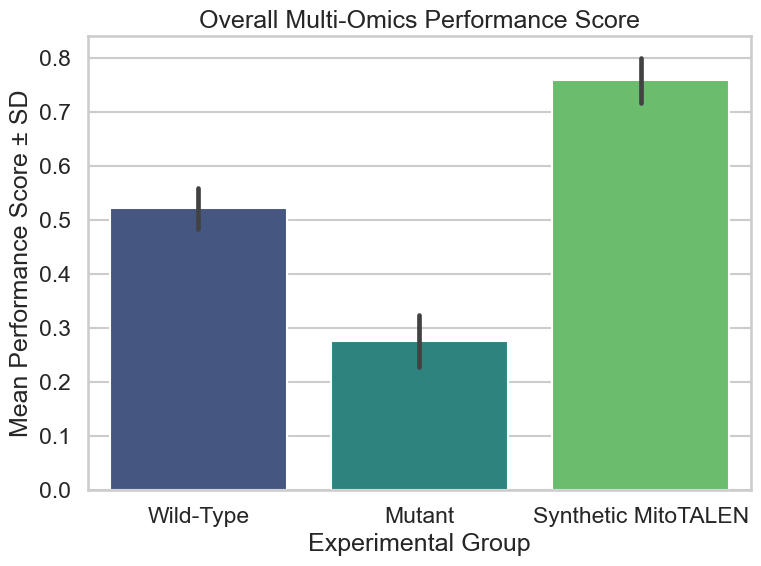

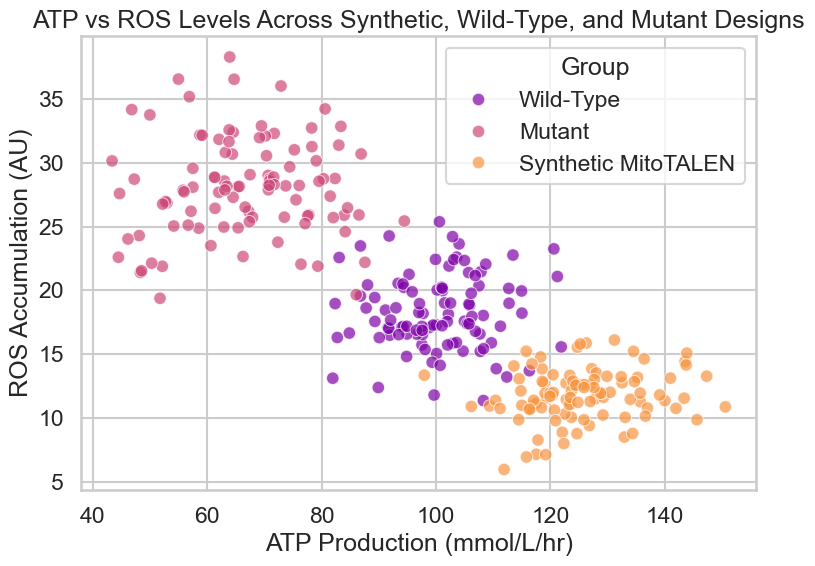

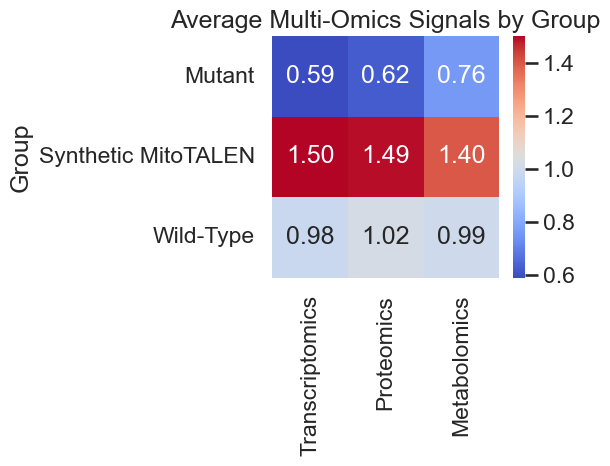

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/934587761.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Group", y="Lifespan", data=df, palette="Set2")


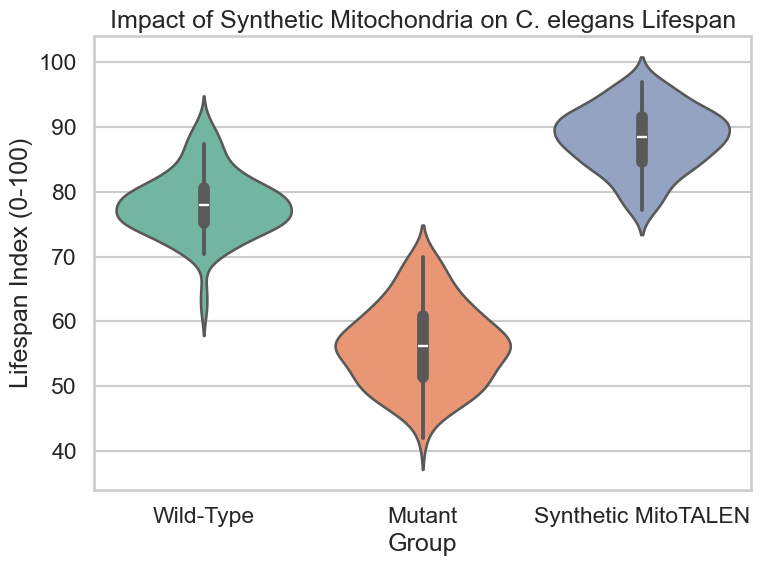

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/934587761.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances, palette="mako")


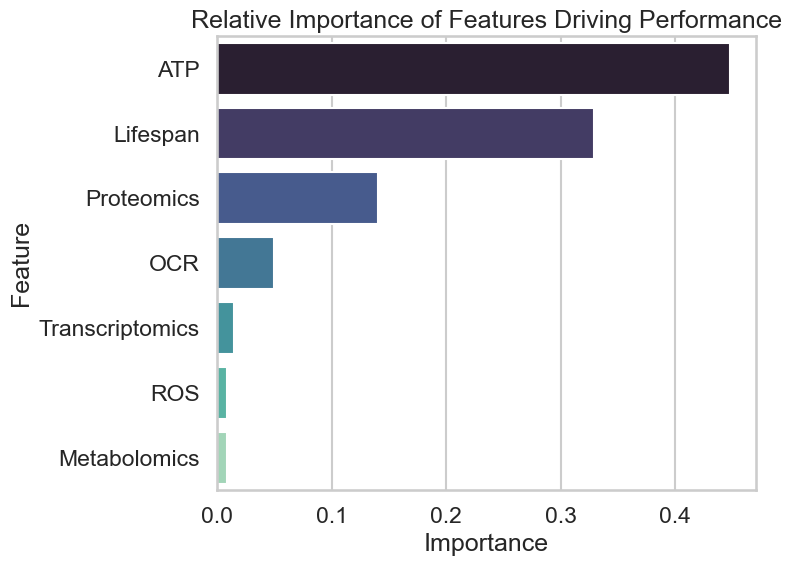

Multi-Omics Dashboard complete — Top synthetic designs exported.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid", context="talk")
np.random.seed(42)

# 1. SIMULATE MULTI-OMICS DATA

samples = 300
groups = ["Wild-Type", "Mutant", "Synthetic MitoTALEN"]

data = []
for group in groups:
    for i in range(samples // 3):
        if group == "Wild-Type":
            atp = np.random.normal(100, 10)
            ros = np.random.normal(18, 3)
            ocr = np.random.normal(210, 25)
            lifespan = np.random.normal(78, 5)
            transcript = np.random.normal(1.0, 0.2)
            protein = np.random.normal(1.0, 0.15)
            metabolite = np.random.normal(1.0, 0.15)
        elif group == "Mutant":
            atp = np.random.normal(65, 12)
            ros = np.random.normal(28, 4)
            ocr = np.random.normal(140, 30)
            lifespan = np.random.normal(55, 6)
            transcript = np.random.normal(0.6, 0.2)
            protein = np.random.normal(0.65, 0.2)
            metabolite = np.random.normal(0.7, 0.2)
        else:
            atp = np.random.normal(125, 10)
            ros = np.random.normal(12, 2)
            ocr = np.random.normal(260, 20)
            lifespan = np.random.normal(88, 5)
            transcript = np.random.normal(1.5, 0.2)
            protein = np.random.normal(1.45, 0.15)
            metabolite = np.random.normal(1.4, 0.2)

        data.append([group, atp, ros, ocr, lifespan, transcript, protein, metabolite])

df = pd.DataFrame(data, columns=[
    "Group", "ATP", "ROS", "OCR", "Lifespan",
    "Transcriptomics", "Proteomics", "Metabolomics"
])

# 2. CALCULATE AI-DRIVEN PERFORMANCE SCORE

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.iloc[:, 1:])
scaled_df = pd.DataFrame(scaled, columns=df.columns[1:])

df["Performance_Score"] = (
    0.3 * scaled_df["ATP"] +
    0.25 * scaled_df["OCR"] +
    0.2 * scaled_df["Transcriptomics"] +
    0.1 * scaled_df["Proteomics"] +
    0.1 * scaled_df["Metabolomics"] +
    0.05 * (1 - scaled_df["ROS"])
)

# 3. VISUAL DASHBOARD

# A. Overall Performance by Group
plt.figure(figsize=(8, 6))
sns.barplot(x="Group", y="Performance_Score", data=df, estimator=np.mean, ci="sd", palette="viridis")
plt.title("Overall Multi-Omics Performance Score")
plt.ylabel("Mean Performance Score ± SD")
plt.xlabel("Experimental Group")
plt.tight_layout()
plt.show()

# B. ATP vs ROS Trade-off
plt.figure(figsize=(8, 6))
sns.scatterplot(x="ATP", y="ROS", hue="Group", data=df, palette="plasma", alpha=0.7)
plt.title("ATP vs ROS Levels Across Synthetic, Wild-Type, and Mutant Designs")
plt.xlabel("ATP Production (mmol/L/hr)")
plt.ylabel("ROS Accumulation (AU)")
plt.tight_layout()
plt.show()

# C. Multi-Omics Heatmap
omics_summary = df.groupby("Group")[["Transcriptomics", "Proteomics", "Metabolomics"]].mean()
plt.figure(figsize=(6, 5))
sns.heatmap(omics_summary, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Multi-Omics Signals by Group")
plt.tight_layout()
plt.show()

# D. Lifespan Impact Across Groups
plt.figure(figsize=(8, 6))
sns.violinplot(x="Group", y="Lifespan", data=df, palette="Set2")
plt.title("Impact of Synthetic Mitochondria on C. elegans Lifespan")
plt.ylabel("Lifespan Index (0-100)")
plt.tight_layout()
plt.show()

# E. Feature Importance for Performance Prediction
X = scaled_df
y = df["Performance_Score"]

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, y)

importances = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
importances = importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importances, palette="mako")
plt.title("Relative Importance of Features Driving Performance")
plt.tight_layout()
plt.show()

# 4. EXPORT TOP SYNTHETIC DESIGNS

top_synthetic = df[df["Group"] == "Synthetic MitoTALEN"].sort_values(by="Performance_Score", ascending=False).head(20)
top_synthetic.to_csv("C_elegans_Top_Synthetic_MultiOmics_Designs.csv", index=False)

print("Multi-Omics Dashboard complete — Top synthetic designs exported.")

# AI-Driven Multi-Omics Phenotyping Platform
# *C. elegans* Mitochondrial Genome Engineering (Proof-of-Concept)

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2459259627.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Design_ID", y="Performance_Score", data=top20, palette="viridis")


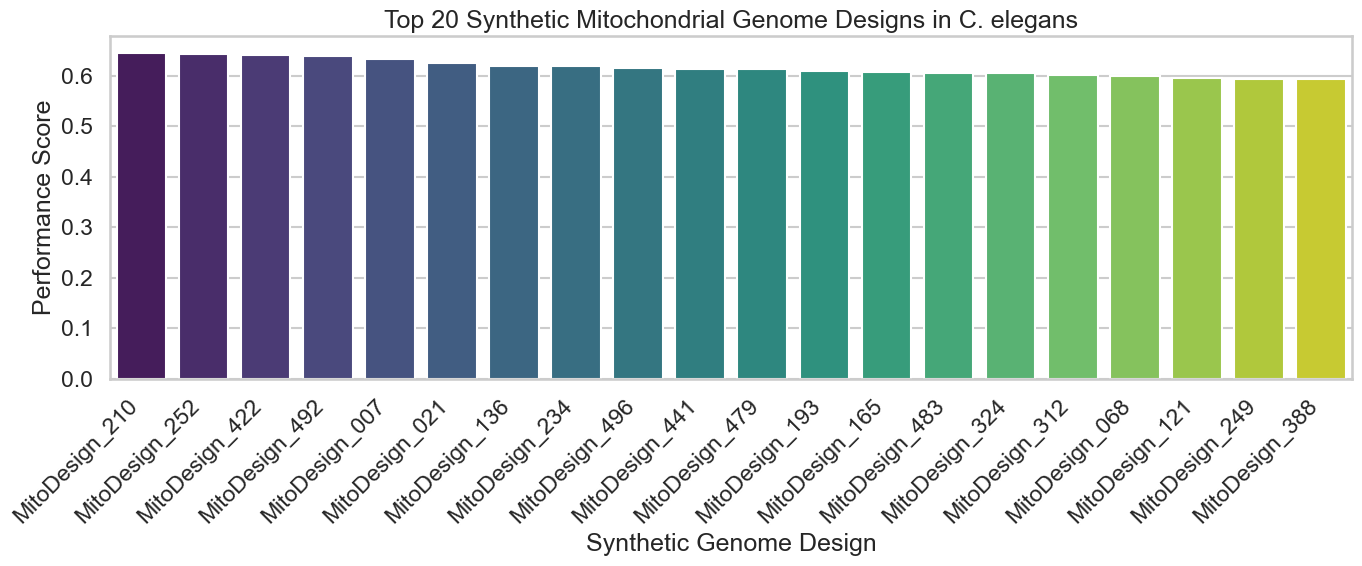

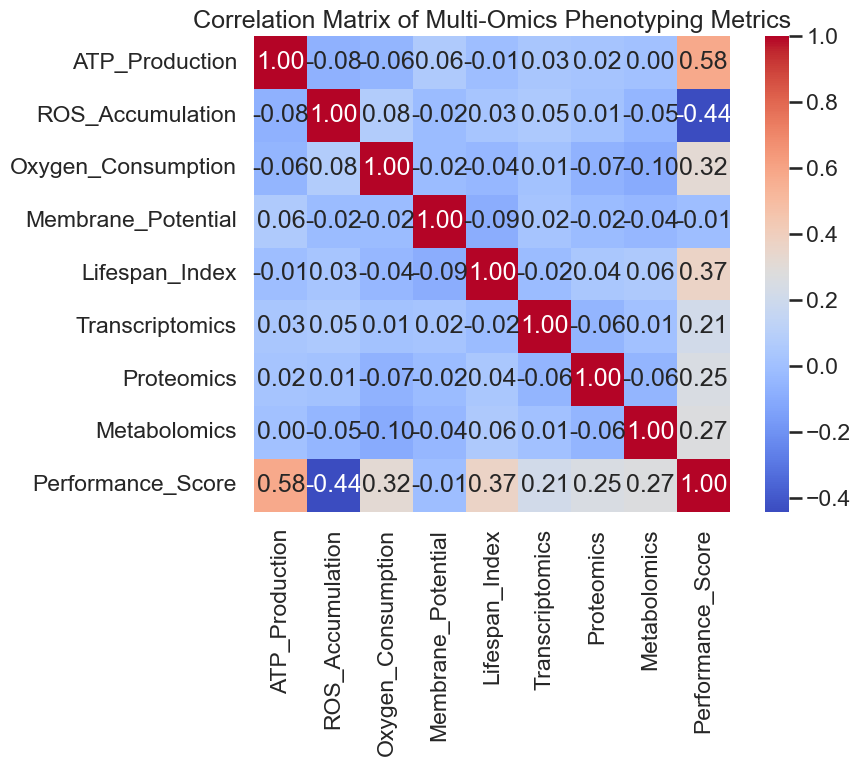

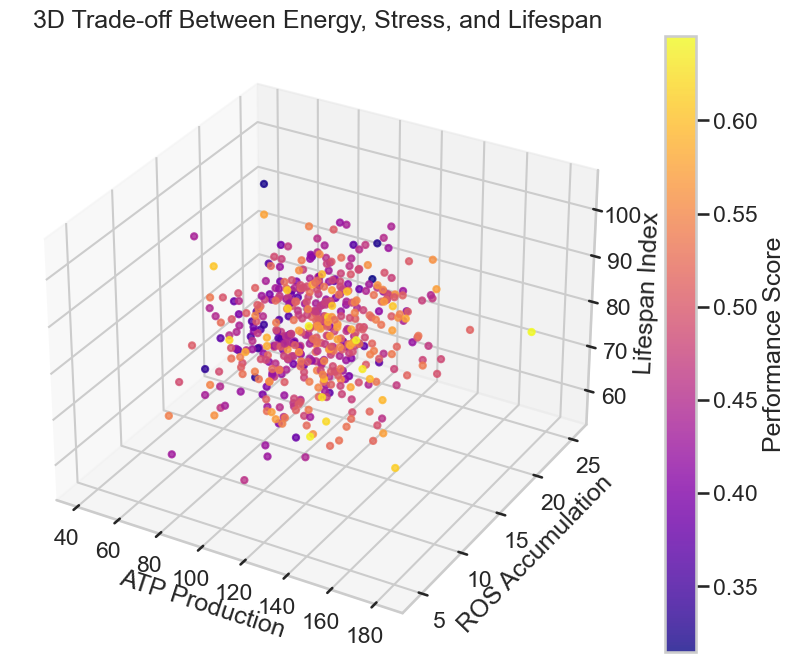

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2459259627.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="cividis")


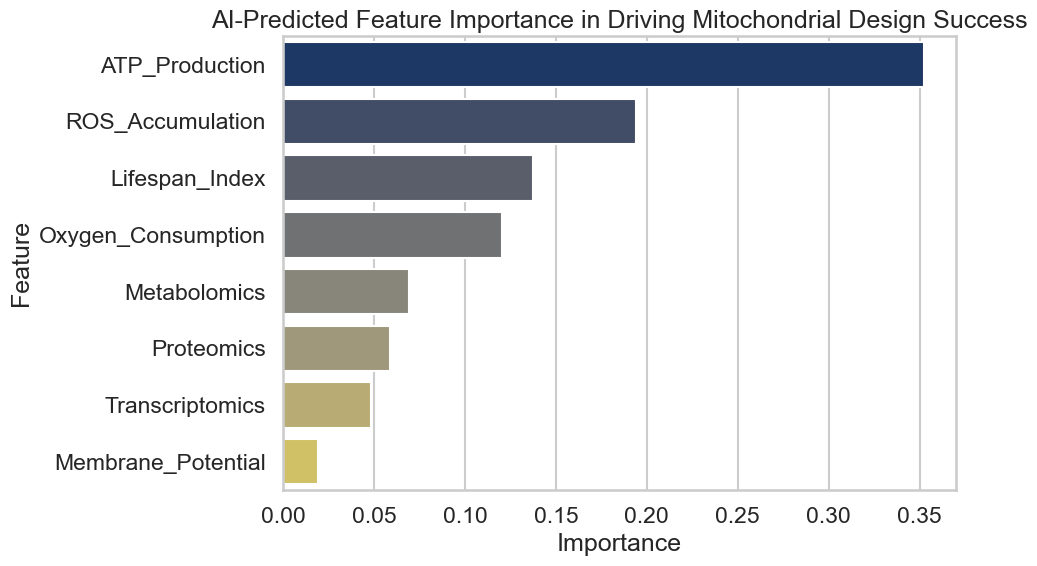

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_21441/2459259627.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Performance_Tier", y="ATP_Production", data=data, palette="Set2", inner="quartile")


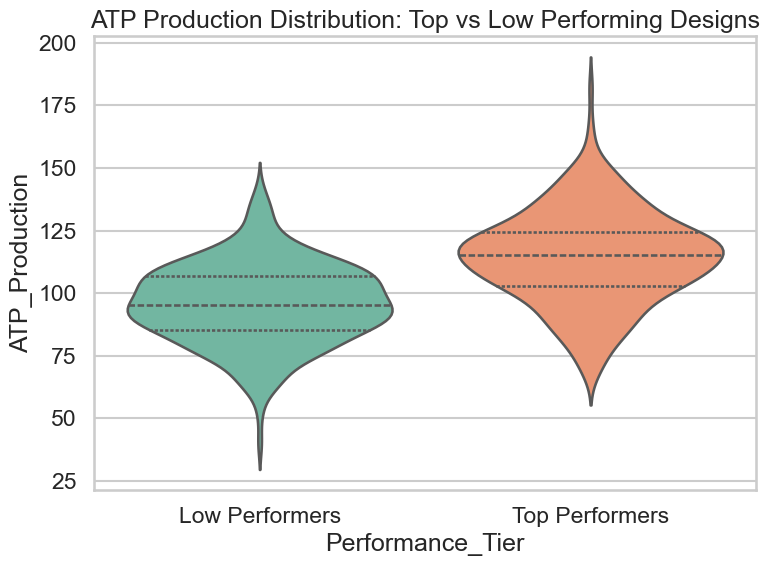

Dashboard complete! Top 20 synthetic designs exported as CSV.


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 1. GENERATE SYNTHETIC DATA

np.random.seed(42)
num_designs = 500

data = pd.DataFrame({
    "Design_ID": [f"MitoDesign_{i+1:03d}" for i in range(num_designs)],
    "ATP_Production": np.random.normal(105, 20, num_designs),       # mmol ATP / L / hr
    "ROS_Accumulation": np.random.normal(15, 4, num_designs),       # AU
    "Oxygen_Consumption": np.random.normal(230, 35, num_designs),   # pmol O2 / min
    "Membrane_Potential": np.random.normal(150, 20, num_designs),   # mV
    "Lifespan_Index": np.random.normal(80, 8, num_designs),         # 0-100
    "Transcriptomics": np.random.normal(500, 80, num_designs),      # Differential gene expression score
    "Proteomics": np.random.normal(300, 50, num_designs),           # Protein abundance score
    "Metabolomics": np.random.normal(200, 40, num_designs)          # Metabolite pathway efficiency
})

# Clip negative values
for col in data.columns[1:]:
    data[col] = data[col].clip(lower=0)

# 2. CALCULATE AI PERFORMANCE SCORE

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.iloc[:, 1:])
scaled_df = pd.DataFrame(scaled, columns=data.columns[1:])

# Weighted scoring formula (AI-guided)
data["Performance_Score"] = (
    0.25 * scaled_df["ATP_Production"] +
    0.15 * scaled_df["Oxygen_Consumption"] +
    0.15 * scaled_df["Lifespan_Index"] +
    0.10 * scaled_df["Transcriptomics"] +
    0.10 * scaled_df["Proteomics"] +
    0.10 * scaled_df["Metabolomics"] +
    0.15 * (1 - scaled_df["ROS_Accumulation"])
)

data = data.sort_values(by="Performance_Score", ascending=False).reset_index(drop=True)

# 3. VISUALIZATION DASHBOARD

sns.set(style="whitegrid", context="talk")

# A. Top 20 Designs
top20 = data.head(20)
plt.figure(figsize=(14, 6))
sns.barplot(x="Design_ID", y="Performance_Score", data=top20, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Synthetic Mitochondrial Genome Designs in C. elegans")
plt.ylabel("Performance Score")
plt.xlabel("Synthetic Genome Design")
plt.tight_layout()
plt.show()

# B. Multi-Omics Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data.drop(columns=["Design_ID"]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Multi-Omics Phenotyping Metrics")
plt.tight_layout()
plt.show()

# C. 3D Trade-Off: ATP vs ROS vs Lifespan
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(
    data["ATP_Production"], data["ROS_Accumulation"], data["Lifespan_Index"],
    c=data["Performance_Score"], cmap="plasma", alpha=0.8
)
fig.colorbar(p, ax=ax, label="Performance Score")
ax.set_xlabel("ATP Production")
ax.set_ylabel("ROS Accumulation")
ax.set_zlabel("Lifespan Index")
plt.title("3D Trade-off Between Energy, Stress, and Lifespan")
plt.show()

# D. Feature Importance (AI-Predicted Drivers of Performance)
rf = RandomForestRegressor(n_estimators=300, random_state=42)
X = data.drop(columns=["Design_ID", "Performance_Score"])
y = data["Performance_Score"]
rf.fit(X, y)

feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="cividis")
plt.title("AI-Predicted Feature Importance in Driving Mitochondrial Design Success")
plt.tight_layout()
plt.show()

# E. ATP Distribution Between Top vs Low Performers
data["Performance_Tier"] = pd.qcut(data["Performance_Score"], q=2, labels=["Low Performers", "Top Performers"])
plt.figure(figsize=(8, 6))
sns.violinplot(x="Performance_Tier", y="ATP_Production", data=data, palette="Set2", inner="quartile")
plt.title("ATP Production Distribution: Top vs Low Performing Designs")
plt.tight_layout()
plt.show()

# 4. EXPORT RESULTS
top20.to_csv("C_elegans_Top20_Synthetic_Mitochondrial_Designs.csv", index=False)
print("Dashboard complete! Top 20 synthetic designs exported as CSV.")